In [1]:
#Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fuzzywuzzy import process

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Reading in the data
df = pd.read_csv('gdp_csv.csv', index_col=None).sort_values(['Country Name', 'Year']).reset_index(drop=True)

print(df.head(20))

   Country Name Country Code  Year         Value
0   Afghanistan          AFG  1960  5.377778e+08
1   Afghanistan          AFG  1961  5.488889e+08
2   Afghanistan          AFG  1962  5.466667e+08
3   Afghanistan          AFG  1963  7.511112e+08
4   Afghanistan          AFG  1964  8.000000e+08
5   Afghanistan          AFG  1965  1.006667e+09
6   Afghanistan          AFG  1966  1.400000e+09
7   Afghanistan          AFG  1967  1.673333e+09
8   Afghanistan          AFG  1968  1.373333e+09
9   Afghanistan          AFG  1969  1.408889e+09
10  Afghanistan          AFG  1970  1.748887e+09
11  Afghanistan          AFG  1971  1.831109e+09
12  Afghanistan          AFG  1972  1.595555e+09
13  Afghanistan          AFG  1973  1.733333e+09
14  Afghanistan          AFG  1974  2.155555e+09
15  Afghanistan          AFG  1975  2.366667e+09
16  Afghanistan          AFG  1976  2.555556e+09
17  Afghanistan          AFG  1977  2.953333e+09
18  Afghanistan          AFG  1978  3.300000e+09
19  Afghanistan     

In [2]:
# Display summary for stock_data
print('Gross Domestic Product Data\n')

print(df['Country Name'].unique())
print(df.info())

Gross Domestic Product Data

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Caribbean small states' 'Cayman Islands'
 'Central African Republic' 'Central Europe and the Baltics' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (excluding high income)' 'Ecuador'
 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea'

Country Name  Country Code  Year   Value
False         False         False  False    11450
dtype: int64


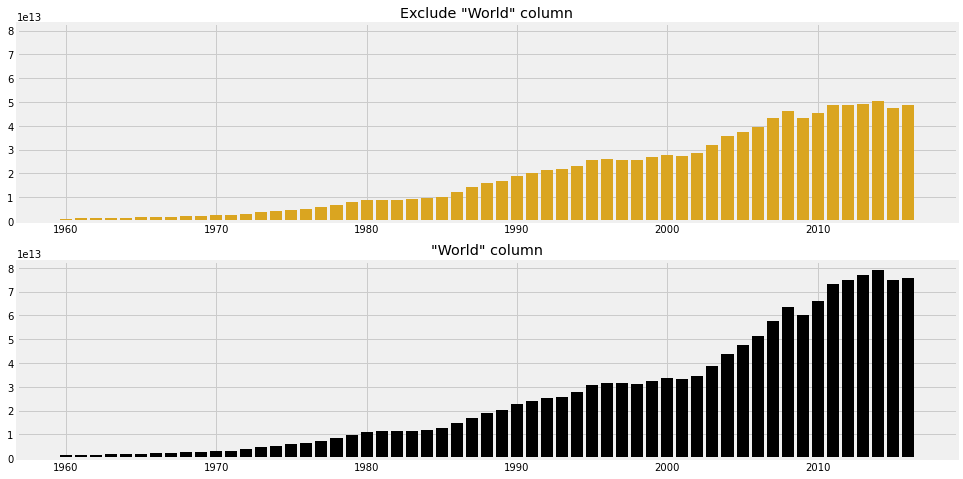

In [3]:
#Existing data has total "World" GDP values
#Split on "World" data and other
world = df[df['Country Name'] == 'World']
wo_world = df[df['Country Name'] != 'World']

#Plot data overview
fig, ax = plt.subplots(2, 1, sharey=True)
ax[0].bar(wo_world['Year'], wo_world['Value'], color = "goldenrod")
ax[1].bar(world['Year'], world['Value'], color = "k")
ax[0].set_title('Exclude "World" column')
ax[1].set_title('"World" column')

print(wo_world.isin(world).value_counts())
plt.show()

In [4]:
#Total countries GDP is not equal total "World" data figures
#Existing data includes many different names in country column, not contained to particular countries
#Import country codes data for returning only countries data
codes= pd.read_csv('codes.csv', sep=';')
print(codes.head())

  Code            Name
0  TWN          Taiwan
1  AFG     Afghanistan
2  ALB         Albania
3  DZA         Algeria
4  ASM  American Samoa


In [5]:
#Merge codes and df
gdp_merge = codes.merge(df, how="inner", left_on="Code", right_on="Country Code").sort_values(['Name', 'Year'])

print(df.shape)
print(gdp_merge.shape)
print(gdp_merge.head())

(11507, 4)
(9174, 6)
  Code         Name Country Name Country Code  Year         Value
0  AFG  Afghanistan  Afghanistan          AFG  1960  5.377778e+08
1  AFG  Afghanistan  Afghanistan          AFG  1961  5.488889e+08
2  AFG  Afghanistan  Afghanistan          AFG  1962  5.466667e+08
3  AFG  Afghanistan  Afghanistan          AFG  1963  7.511112e+08
4  AFG  Afghanistan  Afghanistan          AFG  1964  8.000000e+08


In [6]:
#Drop useless columns
gdp = gdp_merge[['Code', 'Name', 'Year', 'Value']]
print(gdp.dtypes)
print(gdp.head())

Code      object
Name      object
Year       int64
Value    float64
dtype: object
  Code         Name  Year         Value
0  AFG  Afghanistan  1960  5.377778e+08
1  AFG  Afghanistan  1961  5.488889e+08
2  AFG  Afghanistan  1962  5.466667e+08
3  AFG  Afghanistan  1963  7.511112e+08
4  AFG  Afghanistan  1964  8.000000e+08


In [7]:
#Create a pivot table for further plotting and manipulating
df_piv = gdp.pivot_table(index='Name', columns='Year', values='Value')

df_piv.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
Algeria,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,3.852116e+09,4.257219e+09,4.863487e+09,5.077222e+09,6.761786e+09,8.715106e+09,1.320971e+10,1.555793e+10,1.772835e+10,2.097190e+10,2.636449e+10,3.324342e+10,4.234528e+10,4.434867e+10,4.520709e+10,4.880137e+10,5.369828e+10,5.793787e+10,6.369630e+10,6.674227e+10,5.908907e+10,5.563149e+10,6.204510e+10,4.571537e+10,4.800330e+10,4.994646e+10,4.254257e+10,4.176405e+10,4.694150e+10,4.817786e+10,4.818775e+10,4.864057e+10,5.479025e+10,5.474471e+10,5.676029e+10,6.786383e+10,8.532500e+10,1.031982e+11,1.170273e+11,1.349771e+11,1.710007e+11,1.372110e+11,1.612073e+11,2.000191e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658743e+11,1.590491e+11
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.140000e+08,5.270000e+08,5.120000e+08,5.030000e+08,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [8]:
#Use .pct_change to look at the countries GDP value behavior by year
df_piv_pct = df_piv.pct_change(axis=1)
df_piv_pct['PCT'] = df_piv_pct.mean(axis=1)

#Select top20 countries with the highest average pct_change
df_piv_pct = df_piv_pct.sort_values('PCT', ascending=False)
top20_PCT = df_piv_pct['PCT'].head(20)

#print(top20_PCT)
print(top20_PCT)

Name
Nauru                0.229470
Equatorial Guinea    0.218994
Oman                 0.180281
Qatar                0.177327
Myanmar              0.150973
Maldives             0.144360
Saudi Arabia         0.140159
Bosnia               0.135958
Switzerland          0.135149
Iraq                 0.132346
Vietnam              0.130708
Botswana             0.125920
Indonesia            0.124013
South Korea          0.123286
Brunei               0.121313
Angola               0.121185
Macau                0.120439
Singapore            0.118591
Nigeria              0.116356
Nicaragua            0.115912
Name: PCT, dtype: float64


In [9]:
#Create total average row for each column to look at the yearly world GDP behavior
df_piv_pct_in = df_piv_pct.reset_index()
df_piv_pct_in.loc[len(df_piv_pct_in.index)] = df_piv_pct_in.mean()
df_piv_pct_in['Name'] = df_piv_pct_in['Name'].fillna('Avg Yearly PCT Change')

print(df_piv_pct_in.shape)
print(df_piv_pct.shape)
print(df_piv_pct_in.tail())

(209, 59)
(208, 58)
Year                      Name  1960      1961      1962      1963      1964  \
204                 San Marino   NaN       NaN       NaN       NaN       NaN   
205             American Samoa   NaN       NaN       NaN       NaN       NaN   
206   Northern Mariana Islands   NaN       NaN       NaN       NaN       NaN   
207                South Sudan   NaN       NaN       NaN       NaN       NaN   
208      Avg Yearly PCT Change   NaN  0.055486  0.070744  0.085764  0.100087   

Year      1965      1966      1967      1968      1969      1970      1971  \
204        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
205        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
206        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
207        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
208   0.138643  0.083872  0.066163  0.064462  0.103357  0.099473  0.117067   

Year     1972      1973      1

C:\Users\Dima\AppData\Local\Temp/ipykernel_1400/734523800.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_pct_in.loc[len(df_piv_pct_in.index)] = df_piv_pct_in.mean()


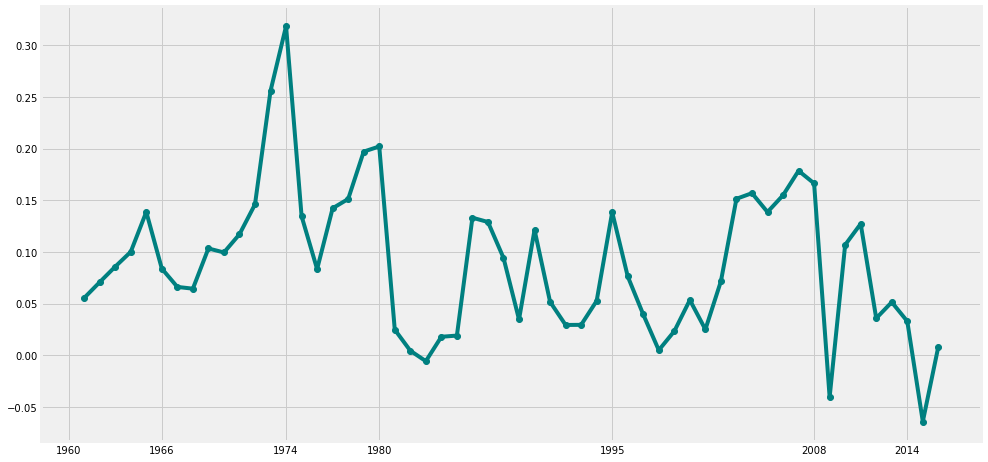

In [10]:
#Plot average yearly GDP percentage changing
plt.plot(df_piv_pct_in.iloc[208,2:-1], marker='o', color='teal')

#Note the years of sharp declines in GDP
plt.xticks([1960, 1966, 1974, 1980, 1995, 2008, 2014])

plt.show()

In [11]:
#Compare top 20 countries on the coincidence between highest avg pct change and GDP
gdp_2016 = gdp[gdp['Year'] == 2016].sort_values('Value', ascending=False).set_index('Name').head(20)
top20_gdp = gdp_2016['Value']
compare = set(top20_gdp.index).difference(top20_PCT.index)
inconsistent = top20_gdp.index.isin(compare)

#Countries with high GDP and high GDP growth year by year
print(top20_gdp[~inconsistent])

Name
South Korea     1.411246e+12
Indonesia       9.322592e+11
Switzerland     6.688513e+11
Saudi Arabia    6.464384e+11
Name: Value, dtype: float64


In [12]:
df_pop = pd.read_csv('WPP2019_TotalPopulationBySex.csv')
print(df_pop.head())

   LocID     Location  VarID Variant  Time  MidPeriod   PopMale  PopFemale  \
0      4  Afghanistan      2  Medium  1950     1950.5  4099.243   3652.874   
1      4  Afghanistan      2  Medium  1951     1951.5  4134.756   3705.395   
2      4  Afghanistan      2  Medium  1952     1952.5  4174.450   3761.546   
3      4  Afghanistan      2  Medium  1953     1953.5  4218.336   3821.348   
4      4  Afghanistan      2  Medium  1954     1954.5  4266.484   3884.832   

   PopTotal  PopDensity  
0  7752.117      11.874  
1  7840.151      12.009  
2  7935.996      12.156  
3  8039.684      12.315  
4  8151.316      12.486  


In [13]:
print(df_pop['Location'].unique())

['Afghanistan' 'Africa' 'African Group' 'African Union'
 'African Union: Central Africa' 'African Union: Eastern Africa'
 'African Union: Northern Africa' 'African Union: Southern Africa'
 'African Union: Western Africa'
 'African, Caribbean and Pacific (ACP) Group of States' 'Albania'
 'Algeria' 'American Samoa' 'Andean Community' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia-Pacific Economic Cooperation (APEC)' 'Asia-Pacific Group'
 'Association of Southeast Asian Nations (ASEAN)' 'Australia'
 'Australia/New Zealand' 'Austria' 'Azerbaijan' 'BRIC' 'BRICS' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Belt-Road Initiative (BRI)' 'Belt-Road Initiative: Africa'
 'Belt-Road Initiative: Asia' 'Belt-Road Initiative: Europe'
 'Belt-Road Initiative: Latin America and the Caribbean'
 'Belt-Road Initiative: Pacific' 'Benin' 'Bermuda' 'Bhutan'
 'Black Sea Economic Cooperation (BSEC)'
 'Bolivarian Alliance for the Am

In [14]:
#For better investigation of GDP by countries, population data needs to be added to the explore
#Join GDP and Population Data Frames
pop_merged = gdp.merge(df_pop[['Location', 'Time', 'PopMale', 'PopFemale', 'PopTotal']], how="left", right_on=['Location', 'Time'], left_on=['Name', 'Year'])

#Drop useless columns
pop_merged = pop_merged[['Code', 'Name', 'Year', 'Value', 'PopTotal']]

pop_merged.head()



,Code,Name,Year,Value,PopTotal
0,AFG,Afghanistan,1960,5.377778e+08,8996.967
1,AFG,Afghanistan,1961,5.488889e+08,9169.406
2,AFG,Afghanistan,1962,5.466667e+08,9351.442
3,AFG,Afghanistan,1963,7.511112e+08,9543.200
4,AFG,Afghanistan,1964,8.000000e+08,9744.772


In [15]:
#Calculate top 20 countries with the highest GDP per capita (last 2016 revision)
pop_merged['GDP per capita'] = pop_merged['Value'] / pop_merged['PopTotal']
pop_merged_2016 = pop_merged[pop_merged['Year'] == 2016]

print(pop_merged_2016)


     Code                      Name  Year         Value     PopTotal  \
37    AFG               Afghanistan  2016  1.946902e+10    35383.028   
70    ALB                   Albania  2016  1.186387e+10     2886.427   
127   DZA                   Algeria  2016  1.590491e+11    40551.398   
142   ASM            American Samoa  2016  6.580000e+08       55.739   
189   AND                   Andorra  2016  2.858518e+09       77.295   
221   AGO                    Angola  2016  9.533511e+10    28842.482   
261   ATG         Antigua & Barbuda  2016  1.460145e+09          NaN   
316   ARG                 Argentina  2016  5.454761e+11    43508.459   
343   ARM                   Armenia  2016  1.057230e+10     2936.147   
418   AUS                 Australia  2016  1.204616e+12    24262.710   
475   AUT                   Austria  2016  3.908000e+11     8747.306   
502   AZE                Azerbaijan  2016  3.784772e+10     9736.041   
559   BHS                   Bahamas  2016  1.126180e+10      377

In [16]:
#Population df has countries which had not been merged with original GDP data
#Check for the null cells
print(pop_merged_2016[pop_merged_2016.isnull().any(axis=1)])

     Code                      Name  Year         Value  PopTotal  \
261   ATG         Antigua & Barbuda  2016  1.460145e+09       NaN   
1026  BOL                   Bolivia  2016  3.380640e+10       NaN   
1049  BIH                    Bosnia  2016  1.691028e+10       NaN   
1215  BRN                    Brunei  2016  1.140065e+10       NaN   
1556  CPV                Cape Verde  2016  1.617467e+09       NaN   
1937  COG       Congo - Brazzaville  2016  7.833509e+09       NaN   
1993  COD          Congo - Kinshasa  2016  3.193086e+10       NaN   
2244  CIV             Côte d’Ivoire  2016  3.637261e+10       NaN   
3731  HKG                 Hong Kong  2016  3.209143e+11       NaN   
3976  IRN                      Iran  2016  4.189767e+11       NaN   
4618  LAO                      Laos  2016  1.590333e+10       NaN   
4965  MAC                     Macau  2016  4.480264e+10       NaN   
5515  MDA                   Moldova  2016  6.749516e+09       NaN   
6374  PSE                 Palestin

In [17]:
#Select last population data
df_pop_2016 = df_pop[df_pop['Time'] == 2016]

#Look at the potential country name matches between GDP and population
pop_merged_2016_fuzz = pop_merged_2016[pop_merged_2016.isnull().any(axis=1)]
pop_fuzz = pop_merged_2016_fuzz['Name'].tolist()
gdp_fuzz = df_pop_2016['Location'].tolist()

for i in pop_fuzz:
    print(i, process.extractOne(i, gdp_fuzz))

Antigua & Barbuda ('Antigua and Barbuda', 95)
Bolivia ('Bolivia (Plurinational State of)', 90)
Bosnia ('Bosnia and Herzegovina', 90)
Brunei ('Brunei Darussalam', 90)
Cape Verde ('Cabo Verde', 80)
Congo - Brazzaville ('Congo', 90)
Congo - Kinshasa ('Congo', 90)
Côte d’Ivoire ("Côte d'Ivoire", 100)
Hong Kong ('China, Hong Kong SAR', 90)
Iran ('Iran (Islamic Republic of)', 90)
Laos ('Barbados', 68)
Macau ('China, Macao SAR', 72)
Moldova ('Republic of Moldova', 90)
Palestine ('State of Palestine', 90)
Russia ('Russian Federation', 90)
South Korea ("Dem. People's Republic of Korea", 86)
St. Kitts & Nevis ('Saint Kitts and Nevis', 84)
St. Lucia ('Saint Lucia', 80)
St. Vincent & Grenadines ('Saint Vincent and the Grenadines', 87)
São Tomé & Príncipe ('Sao Tome and Principe', 81)
Tanzania ('United Republic of Tanzania', 90)
Trinidad & Tobago ('Trinidad and Tobago', 95)
UK ('Ukraine', 90)
US ('Australia', 90)
Vietnam ('Viet Nam', 93)


In [18]:
#Create dictionary for replacing country names
replace_map = {'Antigua & Barbuda' : 'Antigua and Barbuda',
'Bolivia' : 'Bolivia (Plurinational State of)',
'Bosnia' : 'Bosnia and Herzegovina',
'Brunei' : 'Brunei Darussalam',
'Cape Verde' : 'Cabo Verde',
'Congo - Brazzaville' : 'Congo',
'Congo - Kinshasa' : 'Congo',
'Côte d’Ivoire' : "Côte d'Ivoire",
'Hong Kong' : 'China, Hong Kong SAR',
'Iran' : 'Iran (Islamic Republic of)',
'Laos' : 'Barbados',
'Macau' : 'China, Macao SAR',
'Moldova' : 'Republic of Moldova',
'Palestine' : 'State of Palestine',
'Russia' : 'Russian Federation',
'South Korea' : "Republic of Korea",
'St. Kitts & Nevis' : 'Saint Kitts and Nevis',
'St. Lucia' : 'Saint Lucia',
'St. Vincent & Grenadines' : 'Saint Vincent and the Grenadines',
'São Tomé & Príncipe' : 'Sao Tome and Principe',
'Tanzania' : 'United Republic of Tanzania',
'Trinidad & Tobago' : 'Trinidad and Tobago',
'UK' : 'United Kingdom',
'US' : 'United States of America',
'Vietnam' : 'Viet Nam'}

In [19]:
#Кeduce the names of countries to a single one
pop_merged_2016_upd = pop_merged_2016.replace({'Name' : replace_map})

#Merge GDP and Population Data Frames ones again
pop_merged = pop_merged_2016_upd.merge(df_pop[['Location', 'Time', 'PopMale', 'PopFemale', 'PopTotal']], how="left", right_on=['Location', 'Time'], left_on=['Name', 'Year'], suffixes=('_prev','_upd'))
pop_merged = pop_merged[['Name', 'Year', 'Value', 'PopMale', 'PopFemale', 'PopTotal_upd']]

pop_merged.head()

,Name,Year,Value,PopMale,PopFemale,PopTotal_upd
0,Afghanistan,2016,1.946902e+10,18186.994,17196.034,35383.028
1,Albania,2016,1.186387e+10,1470.548,1415.879,2886.427
2,Algeria,2016,1.590491e+11,20481.901,20069.497,40551.398
3,American Samoa,2016,6.580000e+08,NaN,NaN,55.739
4,Andorra,2016,2.858518e+09,NaN,NaN,77.295


In [20]:
#Change column name
dict_col = {'PopTotal_upd' : 'PopTotal'}
pop_merged = pop_merged.rename(columns=dict_col)

#Check if all population data was merged
pop_merged['PopTotal'].isnull().any()

False

In [21]:
#Look at the new Data Frame
pop_merged.head()

,Name,Year,Value,PopMale,PopFemale,PopTotal
0,Afghanistan,2016,1.946902e+10,18186.994,17196.034,35383.028
1,Albania,2016,1.186387e+10,1470.548,1415.879,2886.427
2,Algeria,2016,1.590491e+11,20481.901,20069.497,40551.398
3,American Samoa,2016,6.580000e+08,NaN,NaN,55.739
4,Andorra,2016,2.858518e+09,NaN,NaN,77.295


In [22]:
#Calculate "GDP per capita" column
pop_merged['GDP per capita'] = pop_merged['Value'] / pop_merged['PopTotal']

#Select last data
pop_merged_2016 = pop_merged[pop_merged['Year'] == 2016]
pop_merged_2016.head()

,Name,Year,Value,PopMale,PopFemale,PopTotal,GDP per capita
0,Afghanistan,2016,1.946902e+10,18186.994,17196.034,35383.028,5.502362e+05
1,Albania,2016,1.186387e+10,1470.548,1415.879,2886.427,4.110226e+06
2,Algeria,2016,1.590491e+11,20481.901,20069.497,40551.398,3.922161e+06
3,American Samoa,2016,6.580000e+08,NaN,NaN,55.739,1.180502e+07
4,Andorra,2016,2.858518e+09,NaN,NaN,77.295,3.698192e+07


In [23]:
#Sort countries from the high to low "GDP per capita"
pop_merged_2016 = pop_merged_2016.sort_values('GDP per capita', ascending=False)
pop_merged_2016.head()

,Name,Year,Value,PopMale,PopFemale,PopTotal,GDP per capita
97,Luxembourg,2016,5.863132e+10,291.292,287.974,579.266,1.012166e+08
164,Switzerland,2016,6.688513e+11,4150.103,4229.812,8379.915,7.981600e+07
98,"China, Macao SAR",2016,4.480264e+10,294.035,318.789,612.824,7.310850e+07
126,Norway,2016,3.710762e+11,2646.258,2604.692,5250.950,7.066839e+07
80,Ireland,2016,3.048190e+11,2324.524,2371.266,4695.790,6.491326e+07


In [24]:
#Select top 20 countries with the highest "GDP per capita"
top20_gperp = pop_merged_2016[['Name', 'GDP per capita']].set_index('Name').head(20)
top20_gperp.head()

,GDP per capita
Name,
Luxembourg,1.012166e+08
Switzerland,7.981600e+07
"China, Macao SAR",7.310850e+07
Norway,7.066839e+07
Ireland,6.491326e+07


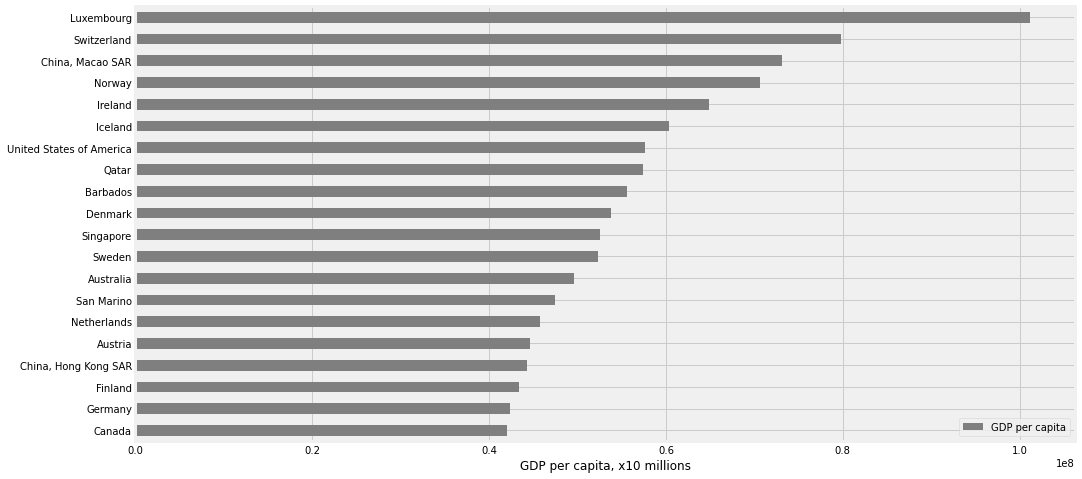

In [25]:
#Plot receiving data
top20_gperp.sort_values('GDP per capita').plot(kind='barh', color='tab:gray')
plt.xlabel('GDP per capita, x10 millions')
plt.ylabel('')

plt.show()

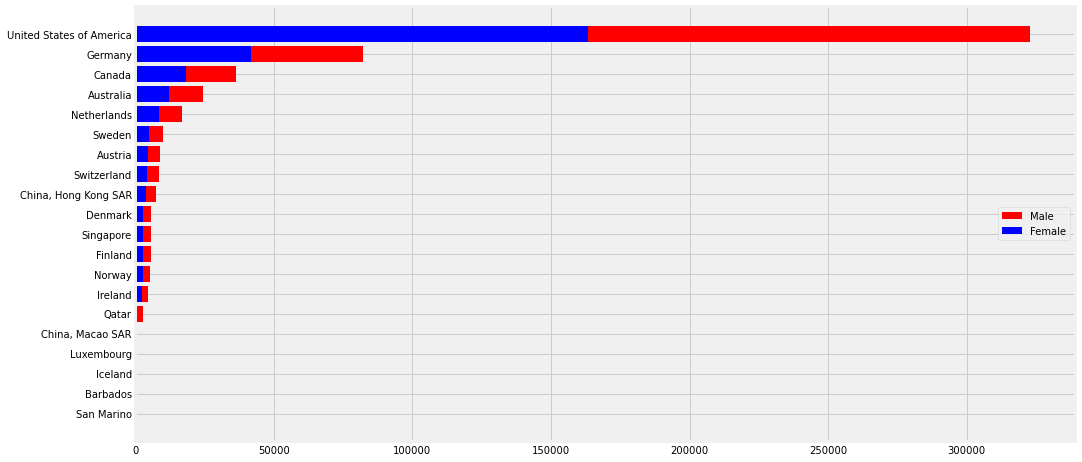

,Name,Year,Value,PopMale,PopFemale,PopTotal,GDP per capita
143,San Marino,2016,1.590708e+09,NaN,NaN,33.503,4.747957e+07
91,Barbados,2016,1.590333e+10,137.902,147.896,285.798,5.564535e+07
75,Iceland,2016,2.004741e+10,166.644,165.565,332.209,6.034579e+07
97,Luxembourg,2016,5.863132e+10,291.292,287.974,579.266,1.012166e+08
98,"China, Macao SAR",2016,4.480264e+10,294.035,318.789,612.824,7.310850e+07
138,Qatar,2016,1.524519e+11,2012.920,641.459,2654.379,5.743412e+07
80,Ireland,2016,3.048190e+11,2324.524,2371.266,4695.790,6.491326e+07
126,Norway,2016,3.710762e+11,2646.258,2604.692,5250.950,7.066839e+07
57,Finland,2016,2.385029e+11,2707.044,2790.670,5497.714,4.338219e+07
149,Singapore,2016,2.969757e+11,2958.818,2694.807,5653.625,5.252837e+07


In [26]:
#Plot population of top 20 countries with highest GDP per capita level
pop_merged_2016_pop = pop_merged_2016.head(20)

#Sort highest GDP per capita level countries by the total population
pop_merged_2016_pop = pop_merged_2016_pop.sort_values('PopTotal')
fig, ax = plt.subplots()
ax.barh(pop_merged_2016_pop['Name'], pop_merged_2016_pop['PopTotal'], label='Male', color="r")
ax.barh(pop_merged_2016_pop['Name'], pop_merged_2016_pop['PopFemale'], label='Female', color='b')
plt.legend()
plt.show()
pop_merged_2016_pop

In [27]:
#Eliminate country names differences between top20_PCT, top20_gdp, and top20_gperp
top20_gdp = top20_gdp.rename(index=replace_map)
top20_gdp.head()

Name
United States of America    1.862448e+13
China                       1.119915e+13
Japan                       4.940159e+12
Germany                     3.477796e+12
United Kingdom              2.647899e+12
Name: Value, dtype: float64

In [28]:
top20_PCT = top20_PCT.rename(index=replace_map)
top20_PCT.head()

Name
Nauru                0.229470
Equatorial Guinea    0.218994
Oman                 0.180281
Qatar                0.177327
Myanmar              0.150973
Name: PCT, dtype: float64

In [29]:
#Select the countries which are present in all three top 20 calculations
revision = top20_gperp.merge(top20_gdp, left_index=True, right_index=True) \
    .merge(top20_PCT, left_index=True, right_index=True)

for i in revision.index:
    print("The list of countries(y) with the highest pct. change, total GDP, and GDP per capita:", i)

The list of countries(y) with the highest pct. change, total GDP, and GDP per capita: Switzerland


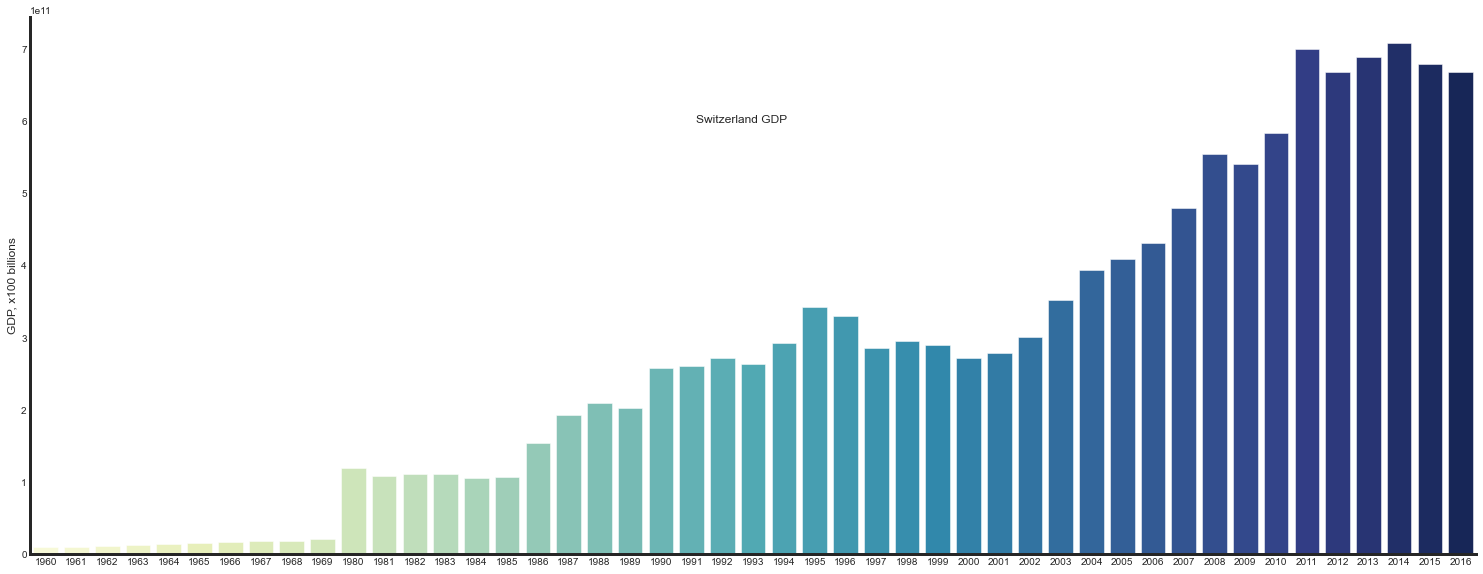

In [30]:
#Plot Switzerland GDP picture as a champion country
gdp_Sw = gdp.loc[gdp['Name'] == 'Switzerland', ['Name', 'Year', 'Value']]

sns.set_style('ticks')
g = sns.catplot(x='Year', y='Value', data=gdp_Sw, kind='bar', height=8.27, aspect=20.7/8.27, palette='YlGnBu')
g.fig.suptitle('Switzerland GDP', y=0.8)
g.set(xlabel="",
ylabel="GDP, x100 billions")

plt.show()

In [31]:
#After all of the explorations, Switzerland combined a consistently high level of GDP growth, total GDP, and GDP per capita.
#During the world crises, the country's GDP has very position
#Switzerland is an economically top powerful country